# An example of Quantum Operation

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np

from qutip import * 
from qutip.piqs import *

import matplotlib.animation as animation
from IPython.display import HTML
from IPython.core.display import Image, display

from qutip.cy.piqs import (
    jmm1_dictionary,
    _num_dicke_states,
    _num_dicke_ladders,
    get_blocks,
    j_min,
    j_vals,
)

exec(open("rename.py").read())

C:\Users\XPS13-9360\AppData\Local\Temp\ipykernel_10896\3880048134.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


## Depolarization for a single qubit

A general Complete Positivity (CP) map on just system can be written as (Kraus representation):
$$\Lambda (\rho) = \sum_{i=1}^N K_i\rho K_i^\dagger$$

The $K_i$ are Kraus operators

Kraus representation for a single qubit that describe depolarization:
$$\Lambda_{dep}(\rho) = \left ( 
    1-\frac{3}{4}p
    \right )\rho +\frac{p}{4} (X\rho X +Y\rho Y +Z\rho Z) $$

Kraus Operators are: 
$$\sqrt{1-\frac{3p}{4}}I, \frac{\sqrt{p}}{2}X, \frac{\sqrt{p}}{2}Y, \frac{\sqrt{p}}{2}Z$$

In [20]:
N = 1
system = Dicke(N = N)
[jx, jy, jz] = jspin(N)
jp = jspin(N,"+")
jm = jp.dag()
w0 = 5
wx = 2.0
system.hamiltonian = w0 * jz + wx * jx
#system.dephasing = 0.01
#D_tls = system.liouvillian()  

In [60]:
p = 0.2
#kraus_id = lindblad_dissipator(np.sqrt(1-3*p/4)*Id,np.sqrt(1-3*p/4)*Id)
kraus_id = np.sqrt(1-3*p/4)*identity(2)
kraus_x = np.sqrt(p)/2*sigma_x()
kraus_y = np.sqrt(p)/2*sigma_y()
kraus_z = np.sqrt(p)/2*sigma_z()
depolarize = [kraus_id,kraus_x,kraus_y,kraus_z] 

In [61]:
D_tls = liouvillian(system.hamiltonian, c_ops = depolarize)

In [62]:
#D_tls = system.liouvillian()

In [63]:
steady_tls = steadystate(D_tls,method = 'power')
jz_ss = expect(jz, steady_tls)
jpjm_ss = expect(jp*jm, steady_tls)

In [64]:
rho0_tls = dicke(N, N/2, -N/2)
t = np.linspace(0, 100, 1000)
result = mesolve(D_tls, rho0_tls, t, [], e_ops = [jz])
rhot_tls = result.states
jzt = result.expect[0]

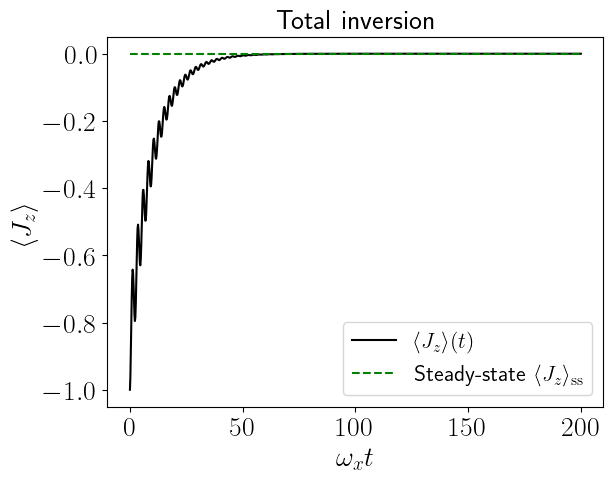

In [65]:
j_max = N/2.
label_size = 20

fig1 = plt.figure(1)

plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
plt.plot(wx*t, jzt/j_max, 'k-', label=r'$\langle J_{z}\rangle(t)$')
plt.plot(wx*t, wx*t * 0 + jz_ss/j_max, 'g--', label = R'Steady-state $\langle J_{z}\rangle_\mathrm{ss}$')
plt.title(r'Total inversion', fontsize = label_size)
plt.xlabel(r'$\omega_xt$', fontsize = label_size)
plt.ylabel(r'$\langle J_{z}\rangle$', fontsize = label_size)
plt.legend( fontsize = 0.8 * label_size)
#plt.yticks([-1, -0.99])
plt.show()
plt.close()

## Dephasing for a single qubit

$$\Lambda_Z(\rho) = \left ( 1-\frac{p}{2}\right ) \rho +\frac{p}{2}Z\rho Z$$

Kraus operators: 

$$\sqrt{1-\frac{p}{2}}I, \sqrt{\frac{p}{2}}Z$$

In [47]:
N = 1
system_2 = Dicke(N = N)
[jx, jy, jz] = jspin(N)
jp = jspin(N,"+")
jm = jp.dag()
w0 = 5
wx = 2.0
system_2.hamiltonian = w0 * jz + wx * jx
#system.dephasing = 0.01
#D_tls = system.liouvillian()  

In [54]:
p = 0.2
#kraus_id = lindblad_dissipator(np.sqrt(1-3*p/4)*Id,np.sqrt(1-3*p/4)*Id)
kraus_id_2 = np.sqrt(1-p/2)*identity(2)
kraus_z_2 = np.sqrt(p)/2*sigma_z()
depolarize_2 = [kraus_id_2,kraus_z_2] 

In [55]:
D_tls_2 = liouvillian(system_2.hamiltonian, c_ops = depolarize_2)

In [56]:
#D_tls = system.liouvillian()

In [57]:
steady_tls = steadystate(D_tls_2,method = 'power')
jz_ss = expect(jz, steady_tls)
jpjm_ss = expect(jp*jm, steady_tls)

In [58]:
rho0_tls = dicke(N, N/2, -N/2)
t = np.linspace(0, 100, 1000)
result = mesolve(D_tls_2, rho0_tls, t, [], e_ops = [jz])
rhot_tls = result.states
jzt = result.expect[0]

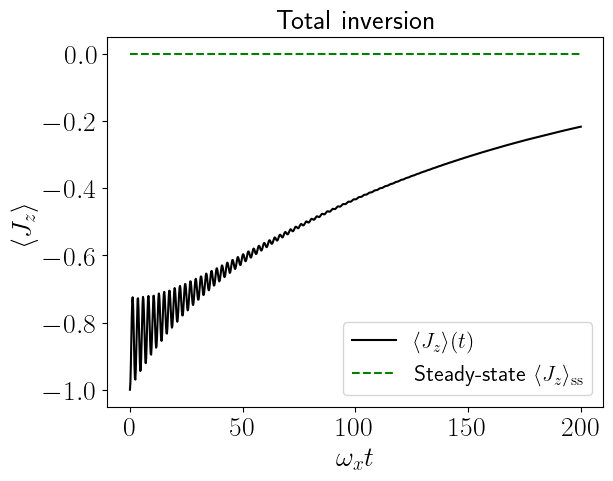

In [59]:
j_max = N/2.
label_size = 20

fig1 = plt.figure(1)

plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
plt.plot(wx*t, jzt/j_max, 'k-', label=r'$\langle J_{z}\rangle(t)$')
plt.plot(wx*t, wx*t * 0 + jz_ss/j_max, 'g--', label = R'Steady-state $\langle J_{z}\rangle_\mathrm{ss}$')
plt.title(r'Total inversion', fontsize = label_size)
plt.xlabel(r'$\omega_xt$', fontsize = label_size)
plt.ylabel(r'$\langle J_{z}\rangle$', fontsize = label_size)
plt.legend( fontsize = 0.8 * label_size)
#plt.yticks([-1, -0.99])
plt.show()
plt.close()

## Dephasing for a single qubit

$$    K_0 = \begin{pmatrix}
        1&0\\0&\sqrt{1-p}
    \end{pmatrix}, K_1 = \begin{pmatrix}
        0&\sqrt{p}\\0&0
    \end{pmatrix}$$

In [15]:
N = 1
system_3 = Dicke(N = N)
[jx, jy, jz] = jspin(N)
jp = jspin(N,"+")
jm = jp.dag()
w0 = 5
wx = 2.0
system_3.hamiltonian = w0 * jz + wx * jx
#system.dephasing = 0.01
#D_tls = system.liouvillian()  

In [42]:
p = 0.1
#kraus_id = lindblad_dissipator(np.sqrt(1-3*p/4)*Id,np.sqrt(1-3*p/4)*Id)
kraus_0 = Qobj([[1, 0], [0, np.sqrt(1-p)]])
kraus_1 = Qobj([[0, np.sqrt(p)], [0, 0]])
depolarize_3 = [kraus_0,kraus_1] 

In [43]:
D_tls_3 = liouvillian(system_3.hamiltonian, c_ops = depolarize_3)

In [44]:
steady_tls = steadystate(D_tls_3,method = 'power')
jz_ss = expect(jz, steady_tls)
jpjm_ss = expect(jp*jm, steady_tls)

In [45]:
rho0_tls = dicke(N, N/2, -N/2)
t = np.linspace(0, 100, 1000)
result = mesolve(D_tls_3, rho0_tls, t, [], e_ops = [jz])
rhot_tls = result.states
jzt = result.expect[0]

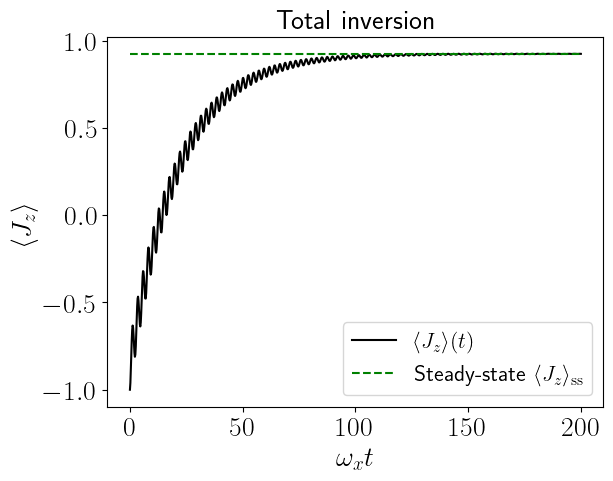

In [46]:
j_max = N/2.
label_size = 20

fig1 = plt.figure(1)

plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
plt.plot(wx*t, jzt/j_max, 'k-', label=r'$\langle J_{z}\rangle(t)$')
plt.plot(wx*t, wx*t * 0 + jz_ss/j_max, 'g--', label = R'Steady-state $\langle J_{z}\rangle_\mathrm{ss}$')
plt.title(r'Total inversion', fontsize = label_size)
plt.xlabel(r'$\omega_xt$', fontsize = label_size)
plt.ylabel(r'$\langle J_{z}\rangle$', fontsize = label_size)
plt.legend( fontsize = 0.8 * label_size)
#plt.yticks([-1, -0.99])
plt.show()
plt.close()